In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold

In [42]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_17828\2014238134.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')


In [43]:
df.head()

,Ano,Lula_art,Lula_ind,Lula_art_ind,Lula_oceanica_art,Calamar_ind,Polvo_art,Polvo_ind,Polvo_art_ind,Polvo_cabecinha_art,...,Mexilhao_ind,Mexilhao_mangue_art,Caramujo_art,Caramujo_ind,Vieira_ind,Berbigao_art,Vongole_art,Outros_moluscos,TOTAL_MOLLUSCS,TOTAL_GROUPS_F&M
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28137.0
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27432.0
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26648.0
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24552.0
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22755.0


In [44]:
x0 = df[['Ano', 'TOTAL_MOLLUSCS']].dropna().values

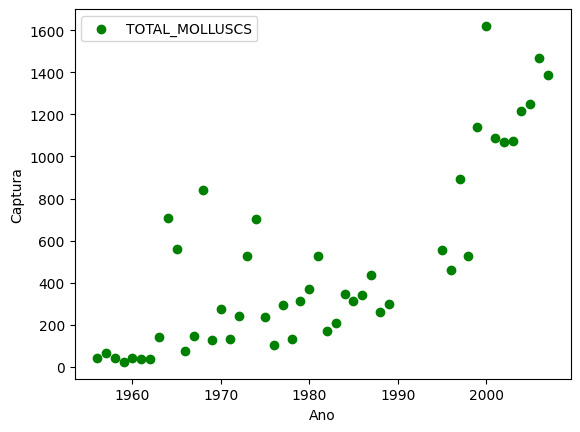

In [46]:
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='TOTAL_MOLLUSCS')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

In [54]:
df_x0= pd.DataFrame(x0, columns= ['Ano', 'TOTAL_MOLLUSCS'])

In [57]:
x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['TOTAL_MOLLUSCS'], dtype= np.float32).reshape(-1, 1)
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

In [59]:
class PrintEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, N):
        super(PrintEveryNEpochs, self).__init__()
        self.N = N

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.N == 0:
            print(f"Epoch {epoch + 1}: loss = {logs['loss']}")

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 50: loss = 0.185433492064476
Epoch 100: loss = 0.17325733602046967
Epoch 150: loss = 0.1656440645456314
Epoch 200: loss = 0.15767602622509003
Epoch 250: loss = 0.16976623237133026
Epoch 300: loss = 0.1469377875328064
Epoch 350: loss = 0.14516958594322205
Epoch 400: loss = 0.14336645603179932
Epoch 450: loss = 0.14496389031410217
Epoch 500: loss = 0.14093001186847687
Epoch 550: loss = 0.14269641041755676
Epoch 600: loss = 0.1386968195438385
Epoch 650: loss = 0.12954667210578918
Epoch 700: loss = 0.12843210995197296
Epoch 750: loss = 0.12053465843200684
Epoch 800: loss = 0.11330286413431168
Epoch 850: loss = 0.11816880851984024
Epoch 900: loss = 0.10613425821065903
Epoch 950: loss = 0.10355822741985321
Epoch 1000: loss = 0.10009145736694336
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


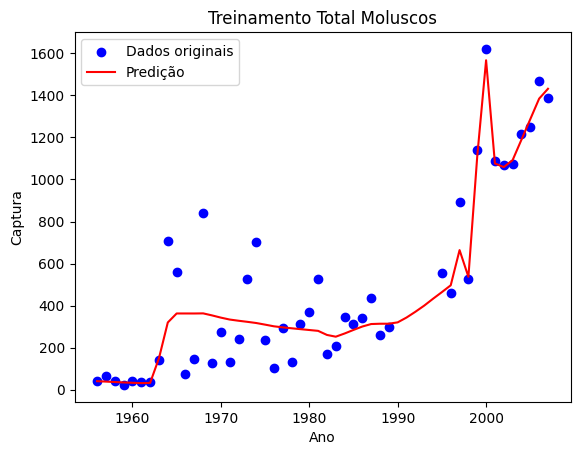

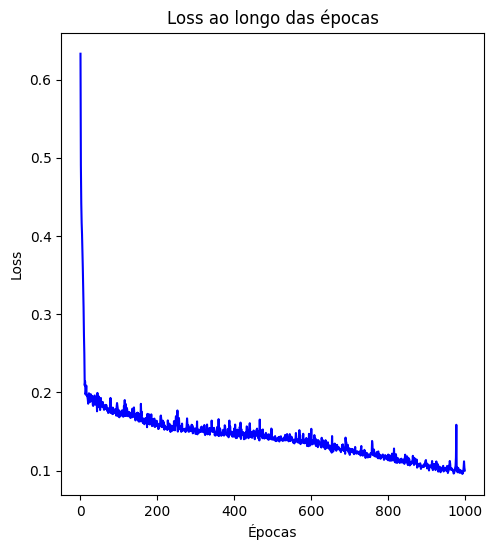

In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=50) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=1000, 
    batch_size=12, 
    steps_per_epoch=200, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Treinamento Total Moluscos')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predição para o ano 1950: 52.600494384765625
Predição para o ano 1951: 50.591064453125
Predição para o ano 1952: 48.91900634765625
Predição para o ano 1953: 46.560150146484375
Predição para o ano 1954: 44.54534912109375
Predição para o ano 1955: 42.669647216796875
Predição para o ano 1990: 320.5533142089844
Predição para o ano 1991: 343.4478759765625
Predição para o ano 1992: 370.8253173828125
Predição para o ano 1993: 400.1496276855469
Predição para o ano 1994: 432.8685607910156
Predição para o ano 2008: 1483.014404296875
Predição para o ano 2009: 1541.45849609375
Predição para o ano 2010: 1603.655517578125
Predição para o ano 2011: 1666.891845703125
Predição para o ano 2012: 1727.677001953125
Predição para o ano 2013: 1788.462158203125
Predição para o ano 2014: 1849.2470703125
Predição para o ano 2015: 1910.327880859375
Predição para o ano 2016: 1971.785888671875
Predição para o ano 2017: 2033.6484375
Predição para o ano 2018: 2095.528564453125
P

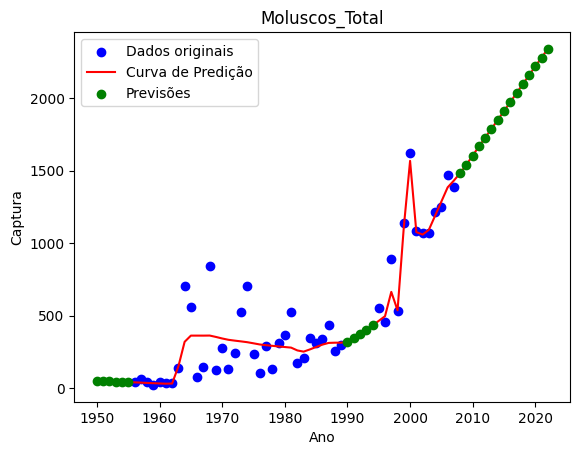

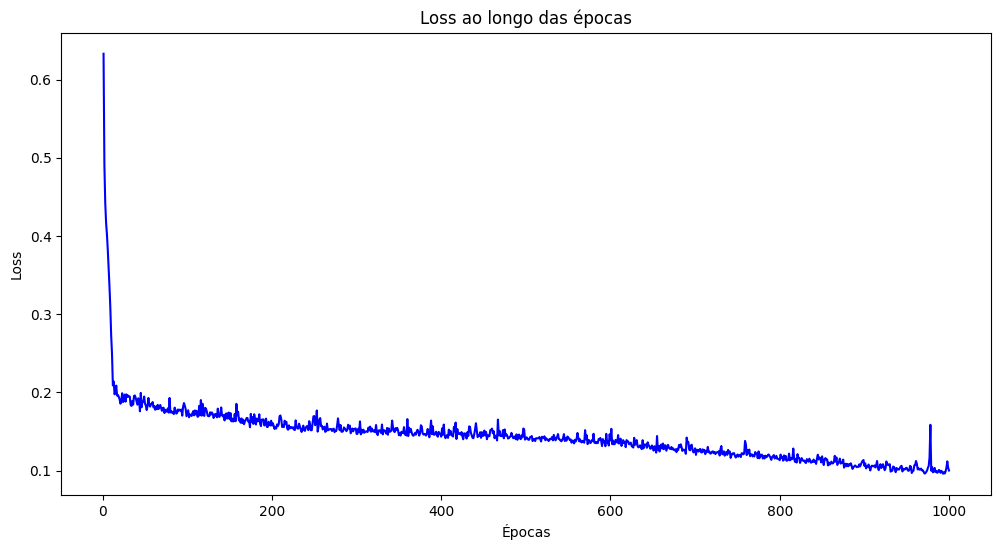

In [90]:
anos_para_prever = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1990, 1991, 1992, 1993, 1994, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean
predicoes = np.maximum(predicoes, 0)
for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Moluscos_Total')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

In [91]:
import pandas as pd
import numpy as np

df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
df_combined['Captura Original'] = df_combined['Captura Original'].clip(lower=0)
df_combined['Captura Preditos'] = df_combined['Captura Preditos'].clip(lower=0)
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Total_Moluscos_reconstruido.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
0   1950.0               NaN         52.600494
1   1951.0               NaN         50.591064
2   1952.0               NaN         48.919006
3   1953.0               NaN         46.560150
4   1954.0               NaN         44.545349
..     ...               ...               ...
68  2018.0               NaN       2095.528564
69  2019.0               NaN       2157.399170
70  2020.0               NaN       2219.185303
71  2021.0               NaN       2279.123291
72  2022.0               NaN       2338.563721

[73 rows x 3 columns]


PermissionError: [Errno 13] Permission denied: 'DataFrame_reconstruido/Total_Moluscos_reconstruido.xlsx'

In [83]:
df_0 = pd.read_excel('DataFrame_reconstruido\Total_Moluscos_reconstruido.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Renan\AppData\Local\Temp\ipykernel_17828\203502866.py:1: SyntaxWarning: invalid escape sequence '\T'
  df_0 = pd.read_excel('DataFrame_reconstruido\Total_Moluscos_reconstruido.xlsx')


In [87]:
x0 = pd.DataFrame(df_0[['Ano', 'Captura Original']].fillna(0).values, columns=['Ano', 'Captura Original'])
x1 = pd.DataFrame(df_0[['Ano', 'Captura Preditos']].fillna(0).values, columns=['Ano', 'Captura Preditos'])

In [89]:
resultado = x0['Captura Original'] + x1['Captura Preditos']

novo_df0 = pd.DataFrame({'Ano': df_0['Ano'], 'TOTAL_MOLLUSCS': resultado})

print(novo_df0)

     Ano  TOTAL_MOLLUSCS
0   1950        0.000000
1   1951        0.000000
2   1952        0.000000
3   1953        0.000000
4   1954        0.000000
..   ...             ...
68  2018      705.814575
69  2019      431.522614
70  2020      281.827789
71  2021      112.098572
72  2022        0.000000

[73 rows x 2 columns]


Curva de Proporção Lula

In [92]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_17828\2014238134.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')
